# Description

Additional figures while preparing cogsci presentation.

# Loading data

In [149]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns

import json
from anytree.importer import JsonImporter
from anytree import PreOrderIter

In [150]:
from scipy import stats
from scipy.stats import sem
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import ttest_rel,ttest_ind

In [151]:
%load_ext rpy2.ipython

from rpy2.robjects.packages import importr
# import R's "base" package
lme4 = importr('lme4')
optimx = importr('optimx')
pbkrtest = importr('pbkrtest')
lmerTest = importr('lmerTest')
ggplot = importr('ggplot2')
dplyr = importr('dplyr')
sjplot = importr('sjPlot')
car = importr('car')
# fitdistrplus = importr('fitdistrplus')
boot = importr('boot')

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [152]:
# home_dir = '/Users/dbao/google_drive_db'+'/road_construction/data/2022_online/'
home_dir = 'G:\My Drive\\researches\\nyu\\road-construction-local-dk\data_online_2022\\'
map_dir = 'active_map/'
data_dir  = 'data/preprocessed'
out_dir = home_dir + 'figures/figures_all/'
R_out_dir = home_dir + 'R_analysis_data/'

In [153]:
data_puzzle_level = pd.read_csv(R_out_dir +  'data.csv')
puzzleID_order_data = data_puzzle_level.sort_values(["subjects","puzzleID","condition"])
data_choice_level = pd.read_csv(R_out_dir +  'choice_level/choicelevel_data.csv')

single_condition_data = puzzleID_order_data[puzzleID_order_data['condition']==1].copy()
single_condition_data = single_condition_data.reset_index()
sc_data_choice_level = data_choice_level[data_choice_level['condition']==1].reset_index()

with open(home_dir +'tree_data/undo_tree', 'r') as file:
    undo_tree = json.load(file)

In [154]:
data_puzzle_level = pd.read_csv(R_out_dir +  'data.csv')
puzzleID_order_data = data_puzzle_level.sort_values(["subjects","puzzleID","condition"])
data_choice_level = pd.read_csv(R_out_dir +  'choice_level/choicelevel_data.csv')

single_condition_data = puzzleID_order_data[puzzleID_order_data['condition']==1].copy()
single_condition_data = single_condition_data.reset_index()
sc_data_choice_level = data_choice_level[data_choice_level['condition']==1].reset_index()

with open(home_dir +'tree_data/undo_tree', 'r') as file:
    undo_tree = json.load(file)

## when they did/  did not undo all the way to the starting

In [155]:
mas_map = [sc_data_choice_level.allMAS[sc_data_choice_level["puzzleID"]==i].tolist()[0] for i in np.unique(sc_data_choice_level['puzzleID'])]
str_ct = []
end_ct = []
str_ct_mean = []
end_ct_mean = []

path_len=[]

## save the seq came back to 0

lenpath_2strt=[]
lenpath_not2strt=[]

err_tot_2strt = []
err_tot_not2strt = []

err2_2strt = []
err2_not2strt  = []

num = []
num_err = []
for sub in range(100):
    str_ct_sbj = []
    end_ct_sbj = []
    dat_sbj  = sc_data_choice_level[sc_data_choice_level['subjects']==sub].sort_values(["puzzleID","index"])
        
    temp_data_2strt = []
    temp_data_not2strt = []
    err_2strt_ = []
    err_not2strt_  = []
    
    i_s_2strt = []
    i_s_not2strt = []
    
    _2strt = 0
    _not2strt = 0
    num_err_2strt = 0
    num_err_not2strt = 0
    for pzi in np.unique(sc_data_choice_level['puzzleID']):
        dat_sbj_pzi = dat_sbj[dat_sbj['puzzleID'] == pzi].reset_index()
        str_ct_pz = []
        end_ct_pz = []
        
        for index in range(len(dat_sbj_pzi)):
            # for non-single undo only (doesnt chjange the result)
            if (dat_sbj_pzi.firstUndo[index] == 1) and (dat_sbj_pzi.lastUndo[index] == 1):
                continue
    
            if dat_sbj_pzi.firstUndo[index] == 1:
                temp_idx_str = index
                str_ct_pz.append((dat_sbj_pzi.currNumCities[index]+1-1)/(mas_map[pzi]-1)) # or datum.currMas
                # because the dataset is counting startcity as 1

            if dat_sbj_pzi.lastUndo[index] == 1:
                temp_idx_end = index
                end_ct_pz.append((dat_sbj_pzi.currNumCities[index]-1)/(mas_map[pzi]-1))
                if end_ct_pz[-1] == 0:
                    temp_data_2strt.append(dat_sbj_pzi.severityOfErrors[temp_idx_str-1]!=0)
                    lenpath_2strt.append(temp_idx_end - temp_idx_str + 1)
                    err_2strt_.append(dat_sbj_pzi.severityOfErrors[temp_idx_str-1])
                    err_tot_2strt.append(dat_sbj_pzi.severityOfErrors[temp_idx_str-1])
                    _2strt += 1
                    num_err_2strt += np.double(dat_sbj_pzi.severityOfErrors[temp_idx_str-1]!=0)
                else:
                    temp_data_not2strt.append(dat_sbj_pzi.severityOfErrors[temp_idx_str-1]!=0)
                    lenpath_not2strt.append(temp_idx_end - temp_idx_str + 1)
                    err_not2strt_.append(dat_sbj_pzi.severityOfErrors[temp_idx_str-1])
                    err_tot_not2strt.append(dat_sbj_pzi.severityOfErrors[temp_idx_str-1])
                    _not2strt += 1
                    num_err_not2strt += np.double(dat_sbj_pzi.severityOfErrors[temp_idx_str-1]!=0)
#             if len(temp_data_2strt)==0:
#                 print('**'*10)
#                 print(str_ct_pz)
#                 print(end_ct_pz)
#                 print(temp_data_2strt)
#                 print(temp_data_not2strt)
#                 print('**'*10)
                    
        str_ct_sbj.extend(str_ct_pz)
        end_ct_sbj.extend(end_ct_pz)
        
    print(_2strt)
    print(_not2strt)
    print('**'*10)
        
    str_ct.extend(str_ct_sbj)
    end_ct.extend(end_ct_sbj)
    str_ct_mean.append(np.mean(str_ct_sbj))
    end_ct_mean.append(np.mean(end_ct_sbj))
    err2_2strt.append(np.mean(np.double(np.array(err_2strt_)!=0)))
    err2_not2strt.append(np.mean(np.double(np.array(err_not2strt_)!=0)))
    
    num.append([_2strt, _not2strt])
    num_err.append([num_err_2strt, num_err_not2strt])
    
dat_2strt_tot = [1-np.mean(temp_data_2strt), np.mean(temp_data_2strt)]
dat_not2strt_tot  = [1-np.mean(temp_data_not2strt), np.mean(temp_data_not2strt)]

28
7
********************
17
14
********************
38
63
********************
45
12
********************
20
6
********************
1
1
********************
15
13
********************
12
2
********************
0
0
********************
18
11
********************
0
1
********************
2
7
********************
0
0
********************


C:\ProgramData\Anaconda3\envs\base37\lib\site-packages\numpy\core\fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\ProgramData\Anaconda3\envs\base37\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


10
1
********************
21
21
********************
10
11
********************
7
3
********************
0
2
********************
2
27
********************
20
2
********************
0
0
********************
20
6
********************
7
6
********************
15
30
********************
26
41
********************
0
0
********************
0
0
********************
0
0
********************
0
0
********************
38
38
********************
1
1
********************
0
0
********************
1
7
********************
0
0
********************
0
0
********************
2
7
********************
4
0
********************
4
9
********************
5
19
********************
7
15
********************
10
18
********************
8
12
********************
13
11
********************
19
17
********************
15
8
********************
13
15
********************
0
0
********************
10
9
********************
10
10
********************
1
1
********************
2
0
********************
1
3
*****************

In [156]:
err_st = np.double(np.array(err_mat_2strt)!=0)
err_nonst = np.double(np.array(err_mat_not2strt)!=0)

In [157]:
print(err_st.mean())
print(err_nonst.mean())

0.10705394190871369
0.13883161512027492


In [158]:
stats.ttest_ind(err_st,err_nonst)

Ttest_indResult(statistic=-2.473575375689037, pvalue=0.013438914519157566)

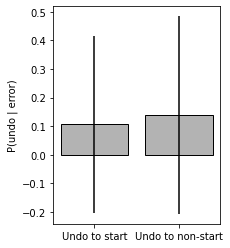

In [159]:
%matplotlib inline

fig, axs = plt.subplots(1, 1)
axs.bar([1,2],[err_st.mean(), err_nonst.mean()],color=[.7,.7,.7], edgecolor = 'k', yerr=[err_st.std(), err_nonst.std()])
axs.set_ylabel('P(undo | error)')
axs.set_xticks([1,2])
axs.set_xticklabels(labels = ['Undo to start', 'Undo to non-start'])#,fontsize=18
fig.set_figheight(4)
fig.set_figwidth(3)
plt.show()
# fig.savefig(out_dir + 'conditional_pundo_givenError.pdf', dpi=600, bbox_inches='tight')
